## Observations and Insights 

In [251]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
import os

# Study data files
mouse_file = os.path.join("data", "Mouse_metadata.csv")
study_file = os.path.join("data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_file)
study_results = pd.read_csv(study_file)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [252]:
# Checking the number of mice.
mice_total = merge_df['Mouse ID'].nunique()
print(f'There are a total of {mice_total} mice in this study.')

There are a total of 249 mice in this study.


In [253]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [254]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = merge_df.loc[merge_df['Mouse ID'] == 'g989']
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [255]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.loc[merge_df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [256]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df['Mouse ID'].nunique()
print(f'There are now a total of {clean_mice} mice in this study after dropping duplicates.')

There are now a total of 248 mice in this study after dropping duplicates.


## Summary Statistics

In [257]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
SEM = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary dataframe.
sum_tumor_vol_df = pd.DataFrame({'Mean Tumor Vol': mean, 
                                 'Median Tumor Vol': median, 
                                 'Variance Tumor Vol': variance, 
                                 'Standard Deviation': std, 
                                 'Standard Error of Tumor Vol': SEM
                                })
sum_tumor_vol_df

,Mean Tumor Vol,Median Tumor Vol,Variance Tumor Vol,Standard Deviation,Standard Error of Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [258]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
sum_tum_agg = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
sum_tum_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

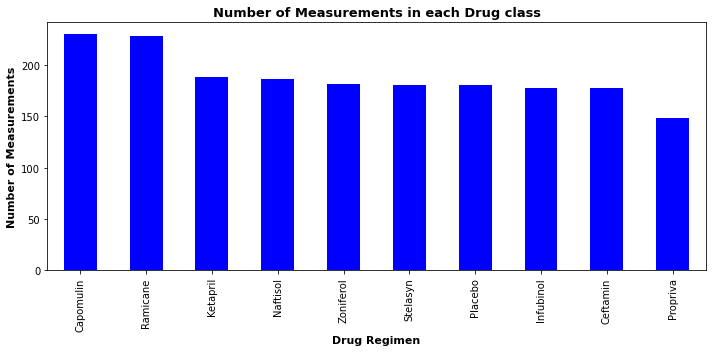

In [259]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#find number of mice in each drug regimen
grouped_drug = clean_df.groupby(['Drug Regimen'])
count_points = grouped_drug['Timepoint'].count()
count_points = count_points.sort_values(ascending=False)

#make a bar graph using pandas with labels
ax = count_points.plot(kind='bar', color='blue', figsize= (10,5))

#set labels
ax.set_title('Number of Measurements in each Drug class', fontsize=13, fontweight='bold')
ax.set_xlabel('Drug Regimen', fontsize=11, fontweight='bold')
ax.set_ylabel('Number of Measurements', fontsize=11, fontweight='bold')

#display bar graph
plt.tight_layout()
plt.show()

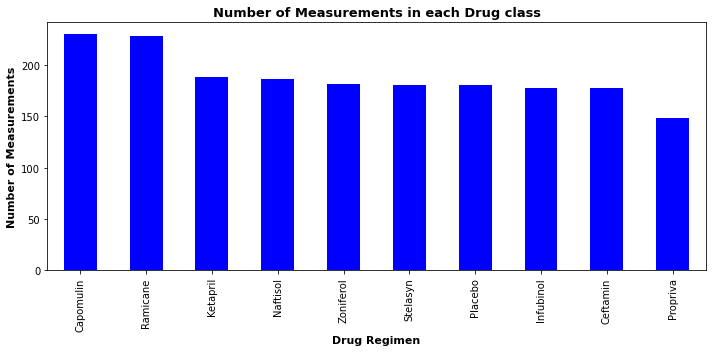

In [260]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#create x and y axis
x_axis = count_points.index
y_axis = count_points.values

#make fig size same as pandas plot
plt.figure(figsize=(10,5))

#create plot using plotlib
plt.bar(x_axis, y_axis, color='b', align='center', width=0.5) 
plt.xticks(rotation='vertical')

#set axis labels
plt.title('Number of Measurements in each Drug class', fontsize=13, fontweight='bold')
plt.xlabel('Drug Regimen', fontsize=11, fontweight='bold')
plt.ylabel('Number of Measurements', fontsize=11, fontweight='bold')
plt.xlim(-0.5,9.5)

#display bar graph
plt.tight_layout()
plt.show()

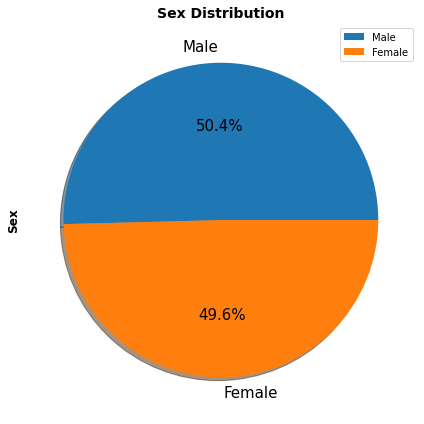

In [261]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#filtering data frame to chart pie plot
drop_dup = clean_df.drop_duplicates(subset=['Mouse ID'])
gender_counts = drop_dup['Sex'].value_counts()

#create pie plot using pandas
ax = gender_counts.plot(kind='pie', figsize= (11,6), autopct='%1.1f%%', shadow=True, legend=True, textprops={'fontsize': 15})
ax.set_title('Sex Distribution', fontsize=14, fontweight='bold')
ax.set_ylabel('Sex', fontsize=12, fontweight='bold')

#display pie plot
plt.tight_layout()
plt.show()

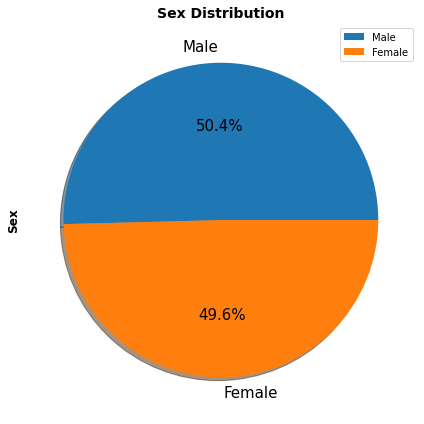

In [262]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#create labels and x axis
labels = 'Male', 'Female'
x_axis = drop_dup['Sex'].value_counts()

#set fig size and font size equal to panda pie chart
plt.figure(figsize=(11,6))
textprops = {'fontsize': 15}

#create pie plot using plotlib
plt.pie(x_axis, labels=labels, autopct="%1.1f%%", shadow=True, textprops = textprops)

#axis labels and legend
plt.title('Sex Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Sex', fontsize=12, fontweight='bold')
plt.legend(loc='best')

#display pie chart
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [263]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
group_cap = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', :]
group_ram = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane', :]
group_inf = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol', :]
group_cef = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin', :]
# Start by getting the last (greatest) timepoint for each mouse
#Capomulin
last_cap = group_cap.groupby(['Mouse ID']).max()['Timepoint']
last_cap_df = pd.DataFrame(last_cap)

#Ramicane
last_ram = group_ram.groupby(['Mouse ID']).max()['Timepoint']
last_ram_df = pd.DataFrame(last_ram)

#Infubinol
last_inf = group_inf.groupby(['Mouse ID']).max()['Timepoint']
last_inf_df = pd.DataFrame(last_inf)

#Ceftamin
last_cef = group_cef.groupby(['Mouse ID']).max()['Timepoint']
last_cef_df = pd.DataFrame(last_cef)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_cap = pd.merge(last_cap_df, clean_df, on=('Mouse ID', 'Timepoint'))
merge_ram = pd.merge(last_ram_df, clean_df, on=('Mouse ID', 'Timepoint'))
merge_inf = pd.merge(last_inf_df, clean_df, on=('Mouse ID', 'Timepoint'))
merge_cef = pd.merge(last_cef_df, clean_df, on=('Mouse ID', 'Timepoint'))

In [264]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Capomulin
#Locate the rows which contain mice and get the tumor volumes
tumor_cap = merge_cap['Tumor Volume (mm3)']

#find quartiles and iqr
quartiles = tumor_cap.quantile([.25,.5,.75])
lq_cap = quartiles[0.25]
uq_cap = quartiles[0.75]
iqr_cap = uq_cap-lq_cap
print(f"The lower quartile for Capomulin's final tumor size: {lq_cap}")
print(f"The upper quartile for Capomulin's final tumor size: {uq_cap}")
print(f"The median quartile for Capomulin's final tumor size: {quartiles[0.5]}")
print(f"The inner quartile range for Capomulin's final tumor size: {iqr_cap}")

#Determine outliers using upper and lower bounds
low_cap = lq_cap - (1.5*iqr_cap)
up_cap = uq_cap + (1.5*iqr_cap)
print(f"Values below {low_cap} could be potential outliers for the Capomulin regimen.")
print(f"Values above {up_cap} could be potential outliers for the Capomulin regimen.")

The lower quartile for Capomulin's final tumor size: 32.37735684
The upper quartile for Capomulin's final tumor size: 40.1592203
The median quartile for Capomulin's final tumor size: 38.125164399999996
The inner quartile range for Capomulin's final tumor size: 7.781863460000004
Values below 20.70456164999999 could be potential outliers for the Capomulin regimen.
Values above 51.83201549 could be potential outliers for the Capomulin regimen.


In [265]:
#Ramicane
#Locate the rows which contain mice and get the tumor volumes
tumor_ram = merge_ram['Tumor Volume (mm3)']

#find quartiles and iqr
quartiles = tumor_ram.quantile([.25,.5,.75])
lq_ram = quartiles[0.25]
uq_ram = quartiles[0.75]
iqr_ram = uq_ram-lq_ram
print(f"The lower quartile for Ramicane's final tumor size: {lq_ram}")
print(f"The upper quartile for Ramicane's final tumor size: {uq_ram}")
print(f"The median quartile for Ramicane's final tumor size: {quartiles[0.5]}")
print(f"The inner quartile range for Ramicane's final tumor size: {iqr_ram}")

#Determine outliers using upper and lower bounds
low_ram = lq_ram - (1.5*iqr_ram)
up_ram = uq_ram + (1.5*iqr_ram)
print(f"Values below {low_ram} could be potential outliers for the Capomulin regimen.")
print(f"Values above {up_ram} could be potential outliers for the Capomulin regimen.")

The lower quartile for Ramicane's final tumor size: 31.56046955
The upper quartile for Ramicane's final tumor size: 40.65900627
The median quartile for Ramicane's final tumor size: 36.56165229
The inner quartile range for Ramicane's final tumor size: 9.098536719999998
Values below 17.912664470000003 could be potential outliers for the Capomulin regimen.
Values above 54.30681135 could be potential outliers for the Capomulin regimen.


In [266]:
#Infubinol
#Locate the rows which contain mice and get the tumor volumes
tumor_inf = merge_inf['Tumor Volume (mm3)']

#find quartiles and iqr
quartiles = tumor_inf.quantile([.25,.5,.75])
lq_inf = quartiles[0.25]
uq_inf = quartiles[0.75]
iqr_inf = uq_inf-lq_inf
print(f"The lower quartile for Infubinol's final tumor size: {lq_inf}")
print(f"The upper quartile for Infubinol's final tumor size: {uq_inf}")
print(f"The median quartile for Infubinol's final tumor size: {quartiles[0.5]}")
print(f"The inner quartile range for Infubinol's final tumor size: {iqr_inf}")

#Determine outliers using upper and lower bounds
low_inf = lq_inf - (1.5*iqr_inf)
up_inf = uq_inf + (1.5*iqr_inf)
print(f"Values below {low_inf} could be potential outliers for the Capomulin regimen.")
print(f"Values above {up_inf} could be potential outliers for the Capomulin regimen.")

The lower quartile for Infubinol's final tumor size: 54.04860769
The upper quartile for Infubinol's final tumor size: 65.52574285
The median quartile for Infubinol's final tumor size: 60.16518046
The inner quartile range for Infubinol's final tumor size: 11.477135160000003
Values below 36.83290494999999 could be potential outliers for the Capomulin regimen.
Values above 82.74144559000001 could be potential outliers for the Capomulin regimen.


In [267]:
#Ceftamin
#Locate the rows which contain mice and get the tumor volumes
tumor_cef = merge_cef['Tumor Volume (mm3)']

#find quartiles and iqr
quartiles = tumor_cef.quantile([.25,.5,.75])
lq_cef = quartiles[0.25]
uq_cef = quartiles[0.75]
iqr_cef = uq_cef-lq_cef
print(f"The lower quartile for Ceftamin's final tumor size: {lq_cef}")
print(f"The upper quartile for Ceftamin's final tumor size: {uq_cef}")
print(f"The median quartile for Ceftamin's final tumor size: {quartiles[0.5]}")
print(f"The inner quartile range for Ceftamin's final tumor size: {iqr_cef}")

#Determine outliers using upper and lower bounds
low_cef = lq_cef - (1.5*iqr_cef)
up_cef = uq_cef + (1.5*iqr_cef)
print(f"Values below {low_cef} could be potential outliers for the Capomulin regimen.")
print(f"Values above {up_cef} could be potential outliers for the Capomulin regimen.")

The lower quartile for Ceftamin's final tumor size: 48.72207785
The upper quartile for Ceftamin's final tumor size: 64.29983003
The median quartile for Ceftamin's final tumor size: 59.85195552
The inner quartile range for Ceftamin's final tumor size: 15.577752179999997
Values below 25.355449580000002 could be potential outliers for the Capomulin regimen.
Values above 87.66645829999999 could be potential outliers for the Capomulin regimen.


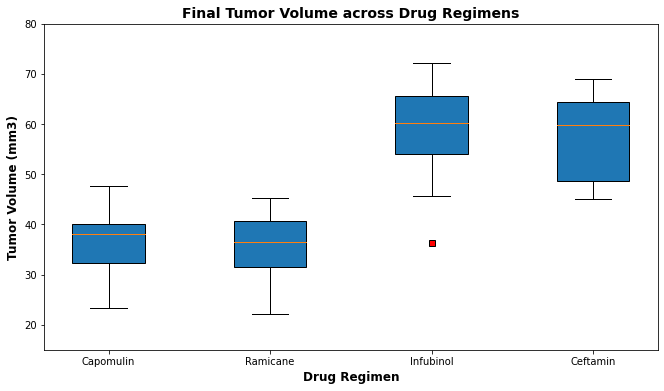

In [268]:
#Create lists for data and labels
drug_data = [tumor_cap, tumor_ram, tumor_inf, tumor_cef]
drug_class = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#setting potential outlier's shape and color
red_box = dict(markerfacecolor='r', marker='s')

#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.boxplot(drug_data, labels=drug_class, flierprops=red_box, patch_artist=True)

#set x and y labels, along with title and limits
ax1.set_title('Final Tumor Volume across Drug Regimens', fontsize=14, fontweight='bold')
ax1.set_xlabel('Drug Regimen', fontsize=12, fontweight='bold')
ax1.set_ylabel('Tumor Volume (mm3)', fontsize=12, fontweight='bold')
plt.ylim(15,80)
plt.xlim(0.6,4.4)

#display boxplot
plt.show()

## Line and Scatter Plots

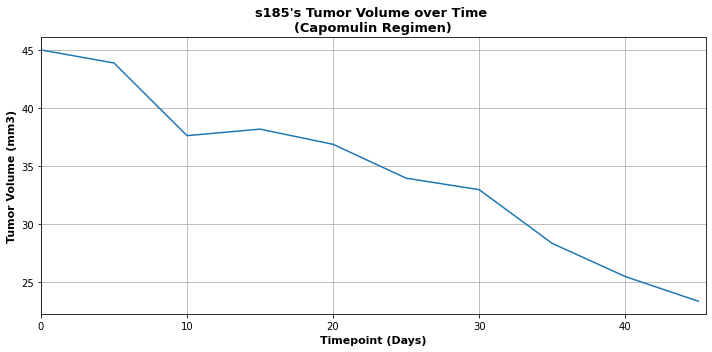

In [269]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Locate a mouse in Capomulin Regimen from grouped dataframe 'group_cap' and pick one
my_mouse_id = 's185'
cap_mouse = clean_df.loc[clean_df['Mouse ID'] == my_mouse_id, :]

#fig size
plt.figure(figsize=(10,5))

#filter out timepoint and tumor columns for chart (x & y axis)
time = cap_mouse['Timepoint']
tumor = cap_mouse['Tumor Volume (mm3)']

#create line chart
plt.plot(time, tumor)

#set labels for line chart and limits
plt.title(my_mouse_id + "'s Tumor Volume over Time \n(Capomulin Regimen)", fontsize=13, fontweight='bold')
plt.xlabel('Timepoint (Days)', fontsize=11, fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontsize=11, fontweight='bold')
plt.xlim(0, 45.5)
plt.grid()

#display line chart
plt.tight_layout()
plt.show()

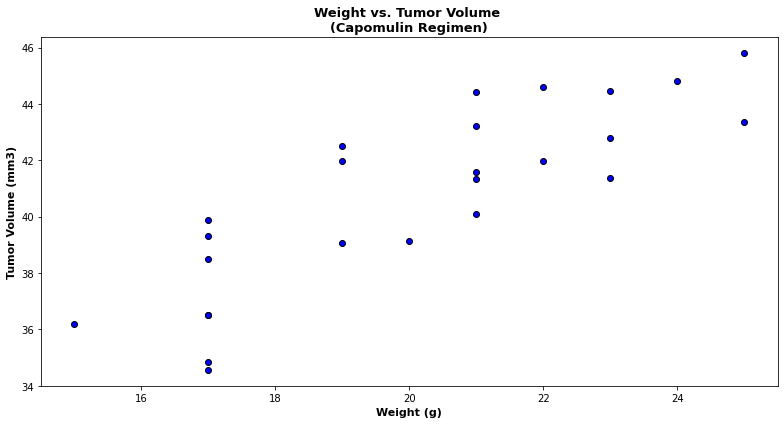

In [270]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#grab unique mice in Capomulin regimen and find mean
mice_id_cap = group_cap.groupby(['Mouse ID']).mean()

#set x and y axis with weight of each mouse and tumor volume
mouse_weight = mice_id_cap['Weight (g)']
mouse_tum_vol = mice_id_cap['Tumor Volume (mm3)']

#fig size
plt.figure(figsize=(11,6))

#create scatter plot
plt.scatter(mouse_weight, mouse_tum_vol, facecolors="b", edgecolors="black")

#set labels for line chart and limits
plt.title("Weight vs. Tumor Volume \n(Capomulin Regimen)", fontsize=13, fontweight='bold')
plt.xlabel('Weight (g)', fontsize=11, fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontsize=11, fontweight='bold')
plt.xlim(14.5,25.5)

#display scatter
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


Text(15, 26, 'y = 0.95x + 21.55')

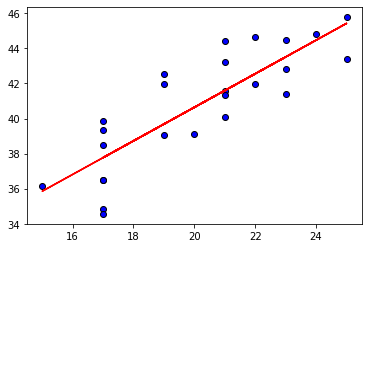

In [287]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
#correlation coefficient
correlation = sts.pearsonr(mouse_weight, mouse_tum_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(mouse_weight, mouse_tum_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, mouse_tum_vol, facecolors="b", edgecolors="black")
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq, (15,26))
